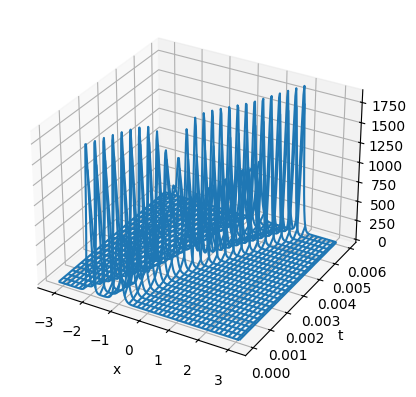

In [1]:
import numpy as np
from numpy.fft import fft, ifft
# from numpy.linalg import norm
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d

# Initialize variables
N = 256
dt = 0.4 / N**2
x = 2 * np.pi / N * np.arange(-N / 2, N / 2)
k = np.concatenate((np.arange(N / 2), np.array([0]), np.arange(-N / 2 + 1, 0)))
ik3 = 1j * k**3

# Initialize initial condition
A = 25
B = 16
u = (
    3 * (A**2) / np.cosh(0.5 * (A * (x + 2))) ** 2
    + 3 * (B**2) / np.cosh(0.5 * (B * (x + 1))) ** 2
)
v = fft(u)

# Initialize parameter for for-loop
tmax = 0.006
nplt = np.floor(tmax / 25 / dt)
nmax = round(tmax / dt)

# Create container to store u and t
udata = np.array(u)
tdata = np.array([0])

# Iterate over  [0,tmax]
for n in range(1, nmax + 1):
    t = n * dt
    g = -0.5j * dt * k
    E = np.exp(dt * ik3 / 2)
    E2 = E**2
    a = g * fft((ifft(v).real) ** 2)
    b = g * fft((ifft(E * (v + a / 2)).real) ** 2)
    c = g * fft((ifft(E * v + b / 2).real) ** 2)
    d = g * fft((ifft(E2 * v + E * c).real) ** 2)
    v = E2 * v + (E2 * a + 2 * E * (b + c) + d) / 6
    if n % nplt == 0:
        u = ifft(v).real
        udata = np.vstack((udata, u))
        tdata = np.hstack((tdata, t))

# Create the waterfall plot
x_grid, t_grid = np.meshgrid(x, tdata)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x_grid, t_grid, udata)
ax.set_xlabel("x")
ax.set_ylabel("t")
plt.show()